# Problem Set 2

In [117]:
using Random, Distributions
using Plots
# using PlotlyJS
using StatsPlots
using DataFrames
gr()
using StatsBase

In [3]:
gaussian = Normal(2,3)

Normal{Float64}(μ=2.0, σ=3.0)

In [3]:
seq = rand(gaussian, 2000)

2000-element Vector{Float64}:
 -0.06259995045072575
  2.628989989212921
  1.282703089070524
  3.8073376330645363
 -2.1361314113794574
 -4.784560371721618
  4.09834539740636
  3.1595911392282305
  3.8670326978805227
  2.106710316022436
  6.0156172988056875
  1.9408756359128547
 -1.4690297290159293
  ⋮
  3.205264306213961
 -3.889683114969248
  1.2313697934316128
  4.124044971183686
  5.138547940239389
  0.3586404681080899
  5.168802595785193
 -1.7981109278038345
  3.0797581183211347
 -0.5140023675377292
 -1.4623903203638688
 -0.46476545314049744

In [40]:
transpose(seq)

1×2000 transpose(::Vector{Float64}) with eltype Float64:
 2.901  12.1718  1.0243  4.7067  0.862809  …  0.0983106  5.65109  -0.34041

In [9]:
histogram(rand(gaussian,2000), bins = 35)

## 2)

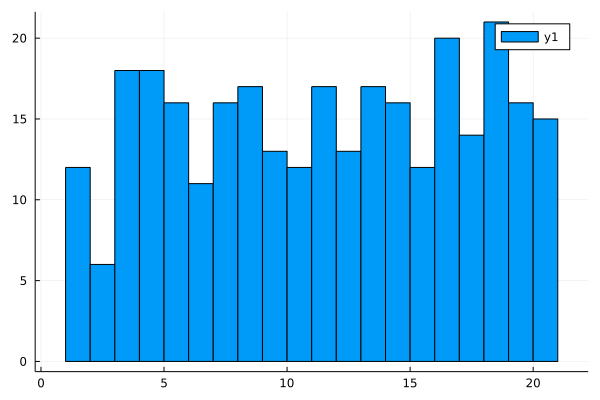

In [167]:
protein  = rand(range(1,20),300)
aa_symbols =["R", "H", "K", "D", "E", "S", "T", "N", "Q", "C", "G", "P", "A", "V", "I", "L", "M", "F", "Y", "W"]
aa_labels = []
histogram(protein,bins = 20)
# xticks = (1:20,aa_symbols)


In [75]:
countlist = [count(i->i==x,protein) for x in range(1,20)]

20-element Vector{Int64}:
  9
 17
 20
 12
 18
 16
 17
 20
 18
 12
 13
 19
 16
 12
 15
 16
 10
 12
 16
 12

In [84]:
Vector(aa_symbols)

LoadError: MethodError: no method matching (Vector)(::Matrix{String})

You might have used a 2d row vector where a 1d column vector was required.
Note the difference between 1d column vector [1,2,3] and 2d row vector [1 2 3].
You can convert to a column vector with the vec() function.
[0mClosest candidates are:
[0m  (Array{T, N} where T)(::AbstractArray{S, N}) where {S, N} at boot.jl:481
[0m  (Vector)() at baseext.jl:38
[0m  (Vector)([91m::DataFrames.GroupKey[39m) at ~/.julia/packages/DataFrames/zqFGs/src/groupeddataframe/groupeddataframe.jl:617
[0m  ...

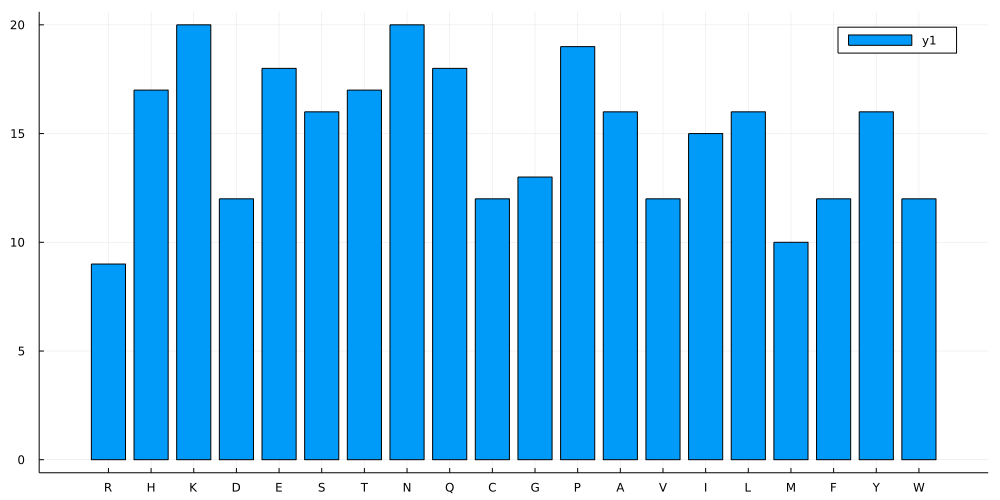

In [99]:
bar(countlist,xticks=(1:20,aa_symbols),size = (1000,500))

In [111]:
aa_labels = Dict(zip(aa_symbols,collect(1:20)))

Dict{String, Int64} with 20 entries:
  "Q" => 9
  "A" => 13
  "W" => 20
  "T" => 7
  "C" => 10
  "P" => 12
  "V" => 14
  "D" => 4
  "G" => 11
  "E" => 5
  "L" => 16
  "Y" => 19
  "S" => 6
  "I" => 15
  "M" => 17
  "N" => 8
  "R" => 1
  "K" => 3
  "H" => 2
  "F" => 18

In [113]:
a= ['R'*10]

LoadError: MethodError: no method matching *(::Char, ::Int64)
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:591
[0m  *([91m::T[39m, ::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at int.jl:88
[0m  *(::Union{AbstractChar, AbstractString}, [91m::Union{AbstractChar, AbstractString}...[39m) at strings/basic.jl:260
[0m  ...

In [130]:
sample(aa_symbols,FrequencyWeights([8.25,5.53,4.06,5.45,1.37,3.93,6.75,7.07,2.27,5.96,9.66,5.84,2.42,3.86,4.70,6.56,5.34,1.08,2.92,6.87]))

LoadError: cannot define function a; it already has a value

In [144]:
freqs = FrequencyWeights([8.25,5.53,4.06,5.45,1.37,3.93,6.75,7.07,2.27,5.96,9.66,5.84,2.42,3.86,4.70,6.56,5.34,1.08,2.92,6.87])

20-element FrequencyWeights{Float64, Float64, Vector{Float64}}:
 8.25
 5.53
 4.06
 5.45
 1.37
 3.93
 6.75
 7.07
 2.27
 5.96
 9.66
 5.84
 2.42
 3.86
 4.7
 6.56
 5.34
 1.08
 2.92
 6.87

In [145]:
cou = Dict()
for i = collect(1:300)
    aa = sample(aa_symbols,freqs)
    cou[aa] = get(cou,aa,0) + 1
end


In [166]:
cou

Dict{Any, Any} with 20 entries:
  "Q" => 6
  "W" => 22
  "T" => 23
  "P" => 18
  "C" => 14
  "V" => 10
  "L" => 27
  "M" => 16
  "N" => 23
  "H" => 20
  "A" => 3
  "D" => 19
  "G" => 27
  "E" => 2
  "Y" => 2
  "I" => 17
  "S" => 15
  "K" => 7
  "R" => 26
  "F" => 3

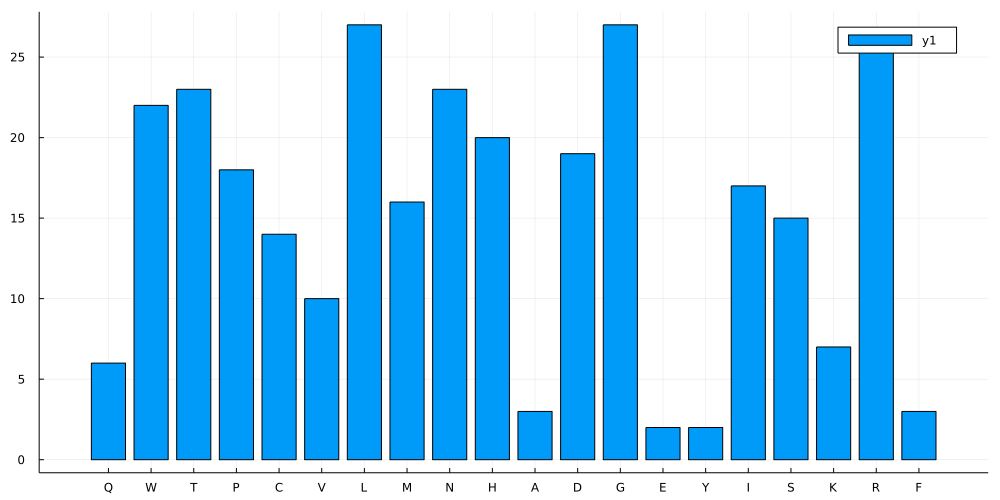

In [165]:
bar(collect(values(cou)),xticks=(1:20,collect(keys(cou))),size=(1000,500))

## Monte Carlo

In [ ]:
# 1. choose initial state x
# 2. Generate move from a distribution to a newstate g(x->x') must be reversible otherwise won't be equilibrium
# 3. Accept or reject this move according to some probability that you compare to a URN
# 4. Store new state (either x' or x)
# 5. Forward move in configuration must be equally likely as going back to original state